<center>

---

## **Árbol de Decisíon**

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

 ## Parámetros del modelo y como evitar sobreajuste en árboles de decisión

El sobreajuste es uno de los desafíos más importantes en el proceso de modelación de árboles de decisión. Si no se definen límites, el árbol tendrá un 100% de precisión en el conjunto de datos de entrenamiento. En el peor caso tendrá una hoja por cada observación.

Dos formas de evitar el sobreajuste: (a) Definir restricciones sobre el tamaño del árbol y (b) Podar el árbol.

#### Definir restricciones sobre el tamaño del árbol (prepruning)
Uso de parámetros para definir un árbol. Los parámetros son independientes de la herramienta de programación (R & Python)

1. **Mínimo de observaciones para dividir un nodo**

- Mínimo número de muestras u observaciones que se requieren en un nodo para ser considerado para ramificación.

- Valores más altos previenen que el modelo aprenda relaciones muy específicas.
- Valores demasiado altos pueden causar un pobre ajuste del modelo. El parámetro debe ajustarse usando validación cruzada.
2. **Mínimo número de observaciones para un nodo terminal**

- Valores más bajos son necesarios para problemas de clases no balanceadas.
3. **Máxima profundidad del árbol (vertical)**

- Una mayor profundidad permite aprender relaciones más específicas.
- Debe ajustarse con validación cruzada.
4. **Máximo número de nodos hoja**

- Se puede definir en lugar de máxima profundidad. Profundidad n = máximo 2^n hojas
5. Máximo número de atributos a considerar para la ramificación

- Seleccionados aleatoriamente.
Como regla general, la raíz cuadrada del número total de atributos funciona apropiadamente. Sin embargo, se debe probar hasta un 30%-40% del número total de atributos.

![](https://bookdown.org/content/2031/images/avoid_overfitting.png)

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Species']

In [4]:
iris = pd.read_csv(url, names=colnames)
iris

,sepal-length,sepal-width,petal-length,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### ANALIZAMOS LOS DATOS 

In [5]:
print('Información del dataset:')
iris.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
print('Descripción del dataset:')
iris.describe()


Descripción del dataset:


,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
print('Distribución de las especies de Iris:')
iris.groupby('Species').size()

Distribución de las especies de Iris:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<AxesSubplot: xlabel='sepal-length', ylabel='sepal-width'>

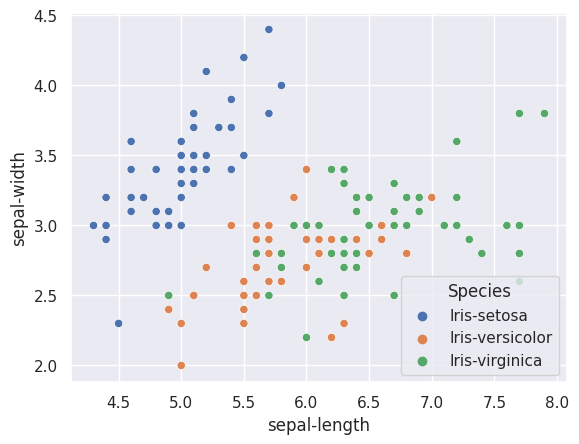

In [8]:
import seaborn as sns
sns.set_theme()
sns.scatterplot(data=iris, x="sepal-length", y="sepal-width", hue="Species")

<AxesSubplot: xlabel='petal-length', ylabel='petal-width'>

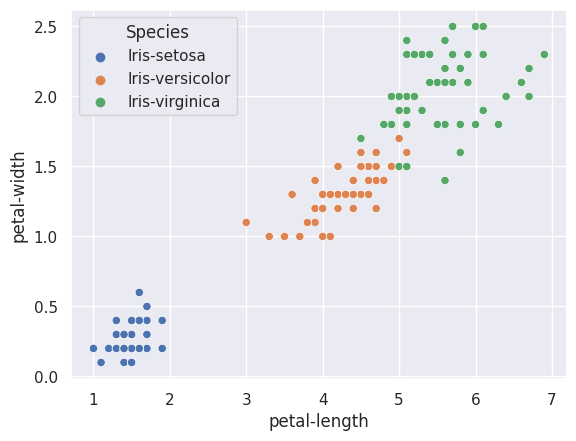

In [9]:
import seaborn as sns
sns.scatterplot(data=iris, x="petal-length", y="petal-width", hue="Species")

In [10]:
X = iris.drop('Species', axis=1)
y = iris['Species']

In [11]:
X

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

## División de prueba y entrenamiento



In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=123)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


## Creación del modelo

In [15]:
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )



## Entrenamiento del modelo

In [16]:
#------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 9


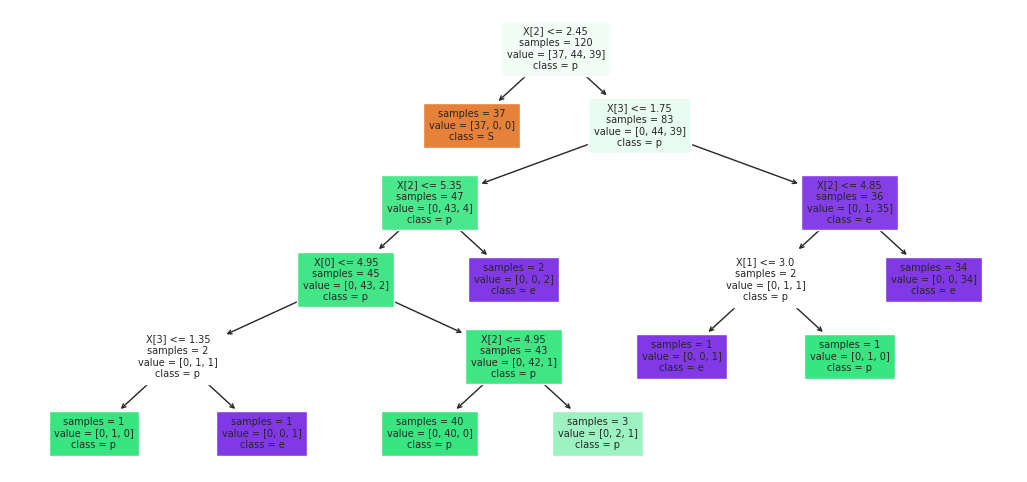

In [17]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = None,
            class_names   = 'Species',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            
            ax            = ax
       )

In [18]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

Profundidad del árbol: 5
Número de nodos terminales: 9


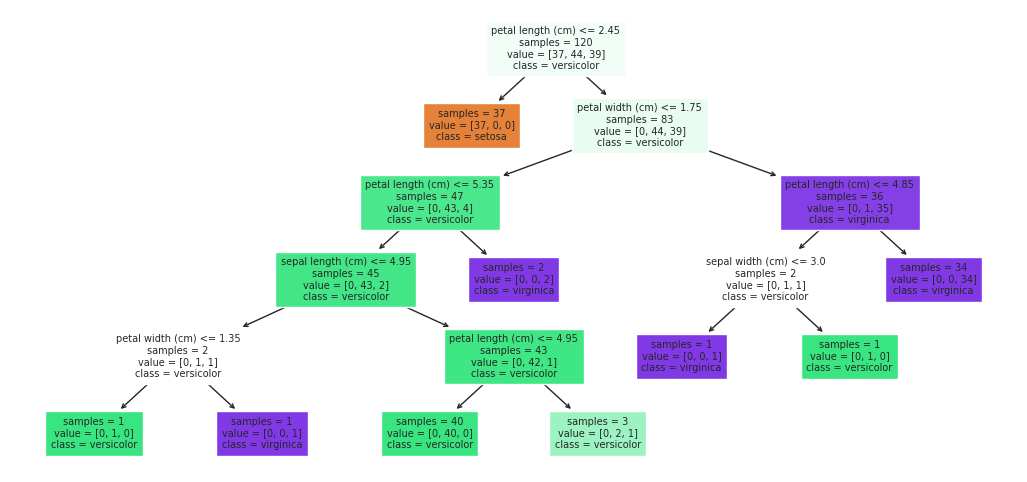

In [19]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = fn,
            class_names   = cn,
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            
            ax            = ax
       )

Mismo gráfico usando graphiviz

In [20]:
!pip install graphviz==0.20.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 11.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [21]:
from sklearn import linear_model, tree
import graphviz

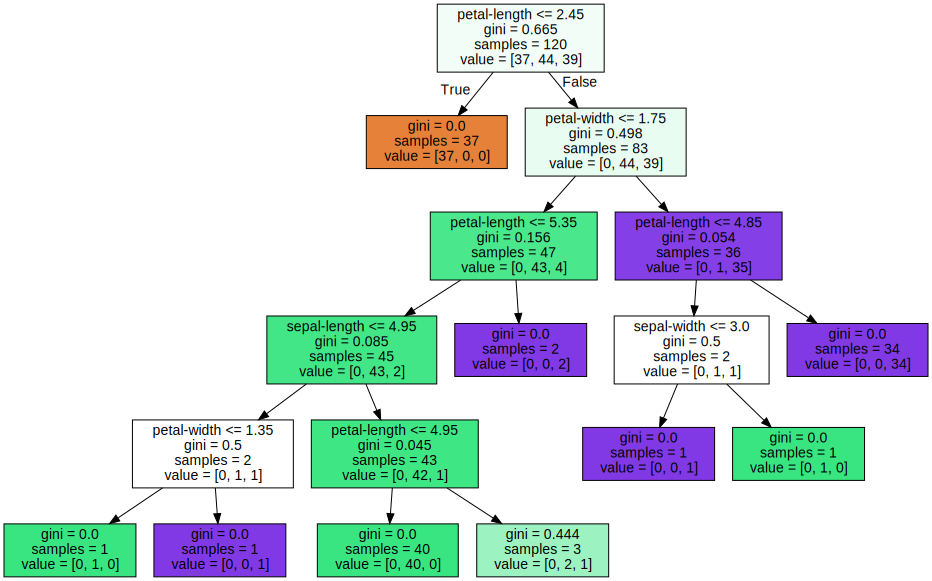

In [22]:
dot_data = tree.export_graphviz(modelo, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png")

## Error de test del modelo

In [23]:
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)
predicciones

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [24]:
print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones)

Matriz de confusión
-------------------


array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]])

In [25]:
from sklearn.metrics import  plot_confusion_matrix


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


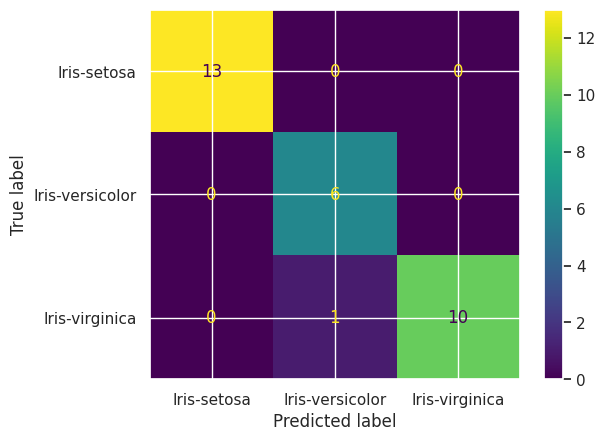

In [26]:
plot_confusion_matrix(modelo, X_test, y_test)

In [27]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 96.66666666666667 %


![](https://bookdown.org/content/2031/images/overfitting.png)

### **Podado del árbol (pruning)**

El podado de árboles de decisión ( "pruning") es una técnica utilizada para reducir la complejidad de un árbol y evitar el sobreajuste (overfitting) del modelo.

- El sobreajuste ocurre cuando un árbol se ajusta demasiado a los datos de entrenamiento, lo que significa que el modelo funciona bien en los datos de entrenamiento pero no generaliza bien para nuevos datos.

- El podado ayuda a evitar este problema eliminando ramas innecesarias del árbol que no contribuyen significativamente a su capacidad predictiva.

Existen dos técnicas de podado de árboles de decisión:

- Podado de costo-complejidad: esta técnica implica agregar un término de penalización al algoritmo de construcción del árbol para reducir su complejidad. A medida que se agrega la penalización, se eliminan las ramas menos importantes del árbol.

- Podado de validación cruzada: esta técnica implica dividir los datos en conjuntos de entrenamiento y validación, y construir un árbol para cada posible combinación de estos conjuntos. Luego, se elige el árbol con mejor rendimiento en los datos de validación y se elimina el resto de los árboles.


Con la finalidad de reducir la varianza del modelo y así mejorar la capacidad predictiva, se somete al árbol a un proceso de pruning. El proceso de pruning intenta encontrar el árbol más sencillo (menor tamaño) que consigue los mejores resultados de predicción.

Para aplicar el proceso de pruning es necesario indicar el argumento `ccp_alpha` que determina el grado de penalización por complejidad. Cuanto mayor es este valor, más agresivo el podado y menor el tamaño del árbol resultante. Dado que no hay forma de conocer de antemano el valor óptimo de ccp_alpha, se recurre a validación cruzada para identificarlo.

Aunque existen otras formas de indentificar árboles "optimos", por ejemplo identificando el valor de `max_depth` y `min_samples_split` mediante validación cruzada, el pruning puede generar mejores resultados ya que permite que una división poco útil se mantenga si las siguientes divisiones que parten de ella sí lo son.

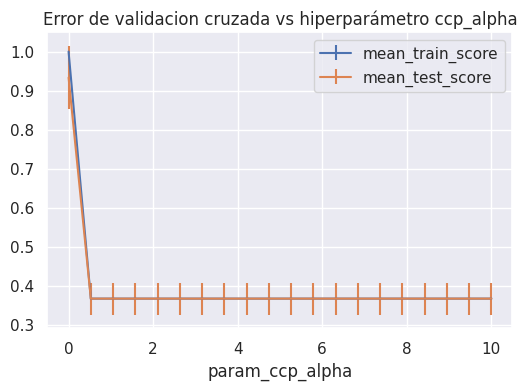

In [28]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 10, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [29]:
 #Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_


{'ccp_alpha': 0.0}

Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol indicando este valor en sus argumentos. Si en el GridSearchCV() se indica refit=True, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

In [30]:
 #Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 6
Número de nodos terminales: 10


In [31]:
# Error de test del modelo final
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 96.66666666666667 %


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b01f3fd-002a-43ad-8b2f-83f22b9a4ee6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>